
1. ¿Cómo se distribuye la tasa de natalidad en el conjunto de datos? ¿Hay algún patrón evidente?
2. ¿Existe una relación aparente entre la tasa de mortalidad infantil y la esperanza de vida? Proporciona una breve descripción de los patrones que observes.
3. ¿Cuál es el continente con la mayor cantidad de países en el conjunto de datos? Proporciona el porcentaje de países en ese continente.
4. ¿Cuál es la mediana de la esperanza de vida en Europa? Proporciona un rango intercuartil aproximado y verifica si existen valores atípicos.
5. ¿Existen relaciones visibles entre la tasa de natalidad y las siguientes variables: tasa de mortalidad infantil, esperanza de vida, densidad de población y población urbana? Usa un subplot. Describe cualquier patrón que encuentres.
6. ¿Cuáles son los 10 países con la mayor área forestal?

In [1]:
# primero nuestras librerias!
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("world_data_full_apply_nul.csv")
df.columns

Index(['Unnamed: 0', 'country', 'density', 'abbreviation', 'agricultural_land',
       'land_area', 'armed_forces_size', 'birth_rate', 'calling_code',
       'capital/major_city', 'co2-emissions', 'cpi', 'cpi_change',
       'currency-code', 'fertility_rate', 'forested_area', 'gasoline_price',
       'gdp', 'gross_primary_education_enrollment',
       'gross_tertiary_education_enrollment', 'infant_mortality',
       'largest_city', 'life_expectancy', 'maternal_mortality_ratio',
       'minimum_wage', 'official_language', 'out_of_pocket_health_expenditure',
       'physicians_per_thousand', 'population',
       'population_labor_force_participation', 'tax_revenue', 'total_tax_rate',
       'unemployment_rate', 'urban_population', 'latitude', 'longitude',
       'continent'],
      dtype='object')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Count')

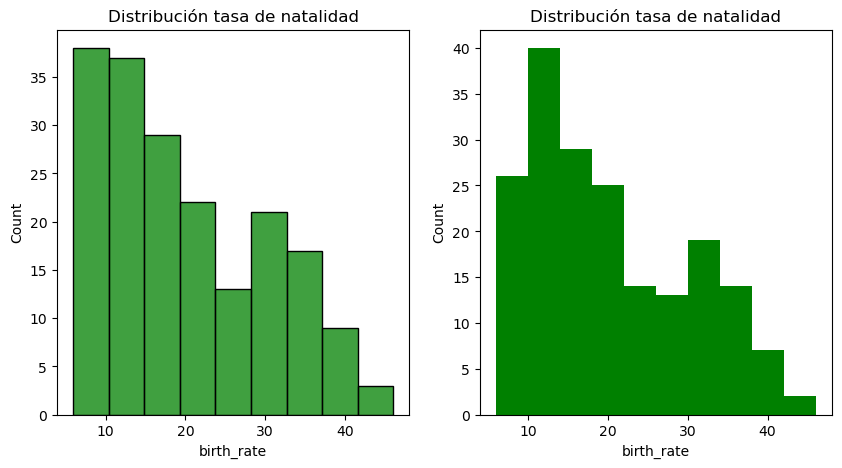

In [3]:
# 1. ¿Cómo se distribuye la tasa de natalidad en el conjunto de datos? ¿Hay algún patrón evidente?

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize= (10,5))
sns.histplot(x="birth_rate", data=df, color="green", ax=axes[0]);
axes[0].set_title("Distribución tasa de natalidad")
axes[1].hist(x=df["birth_rate"], color="green")
axes[1].set_title("Distribución tasa de natalidad")
axes[1].set_xlabel("birth_rate")
axes[1].set_ylabel("Count")

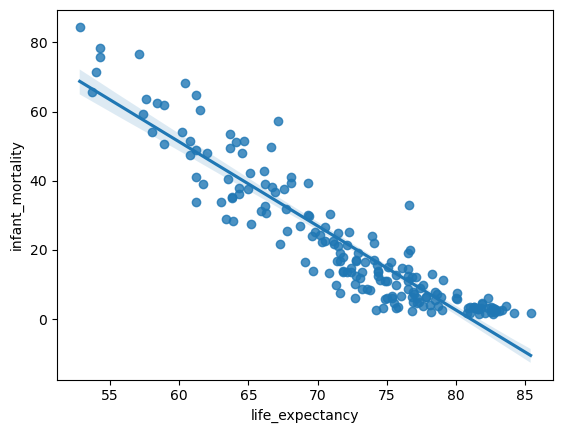

In [4]:
# 2. ¿Existe una relación aparente entre la tasa de mortalidad infantil y la esperanza de vida? 
# Proporciona una breve descripción de los patrones que observes.

sns.regplot(x='life_expectancy', y='infant_mortality', data=df);

In [5]:
# 3. ¿Cuál es el continente con la mayor cantidad de países en el conjunto de datos? 
# Proporciona el porcentaje de países en ese continente.

df1= df.groupby("continent")["country"].count().reset_index()
df1

,continent,country
0,Africa,53
1,Asia,45
2,Central America,20
3,Europe,47
4,North America,2
5,Oceania,14
6,South America,13


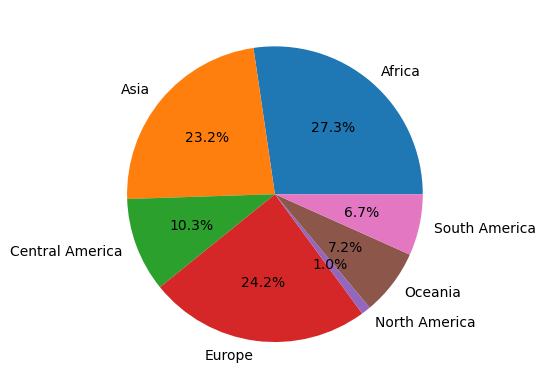

In [9]:
plt.pie(df1["country"], labels=df1["continent"], autopct= '%1.1f%%');

In [11]:
# 4. ¿Cuál es la mediana de la esperanza de vida en Europa? 
# Proporciona un rango intercuartil aproximado y verifica si existen valores atípicos.

df2= df.groupby("continent")["life_expectancy"].count().reset_index()
df2

,continent,life_expectancy
0,Africa,52
1,Asia,44
2,Central America,20
3,Europe,43
4,North America,2
5,Oceania,12
6,South America,13


In [12]:
df_europe = df2[df2['continent'] == 'Europe']
df_europe

,continent,life_expectancy
3,Europe,43


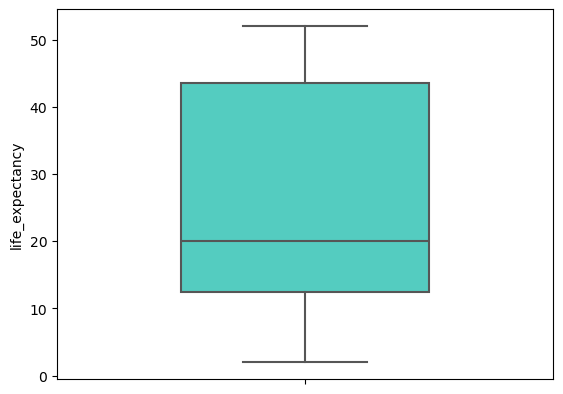

In [18]:
sns.boxplot(y = "life_expectancy", 
            data = df2, 
            width = 0.5, 
            color = "turquoise");

In [ ]:
# 5. ¿Existen relaciones visibles entre la tasa de natalidad y las siguientes variables: tasa de mortalidad infantil, esperanza de vida, densidad de población y población urbana?
# Usa un subplot. Describe cualquier patrón que encuentres.